# Homework 2 (Part 2): Spectral clustering


<span style="color: red; font-size: 14pt">Soft deadline: 15.12.2022</span>

<span style="color: red; font-size: 14pt">Hard deadline: 16.12.2022 </span>

**Requirements**: 

- The report shoulbe in a file: ``MMDA2022-HW1-p2-Spectral_<your_full_name>.ipynb``;
- It should be sent to dmitrii.ignatov@gmail.com (Dmitry Ignatov: the lecturer) and futurelifestefan@gmail.com (Stefan Nikolić: TA) with the topic [MMDA2022-HW1-p2-Spectral]-your_full_name.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### 1 (Warm up). Finding a partition (0%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [2]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [3]:
n = 1000

In [4]:
x = np.arange(n)

In [5]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
np.random.shuffle(x)

In [7]:
x

array([952, 516, 672, 787, 162, 840, 140,  59, 543, 462, 408,  21, 685,
       546, 242, 211, 645, 122, 442, 472, 601, 647,  35,  49, 427, 800,
        92, 489, 923, 273, 125, 864,  80, 754, 596, 238, 407, 791, 473,
        74, 149, 457, 845,  96, 189, 580, 280, 112,  10, 776, 696, 498,
       812, 632, 906, 507, 991, 789, 348,  82, 782, 640,  53, 680, 370,
       564, 191, 597, 121, 957, 236, 976, 466, 643, 170, 258, 586, 587,
       101, 941, 633, 600,   2, 114, 182,  46, 873, 567, 254, 779, 541,
       773, 284, 764, 129, 815, 110, 607, 319, 944, 616, 241, 622,  45,
       996, 877, 671, 131, 717, 874, 312, 589, 862, 750, 223, 588, 803,
       626, 826, 470,  51, 467, 699, 461, 811, 843, 814, 163, 609, 322,
       341, 756, 729, 579, 608, 621, 155, 688, 644, 825, 354, 214, 338,
        12, 181,  29, 405, 167, 902, 994, 491, 842, 134, 723, 595, 414,
       233, 920, 667, 291, 124,  50, 377, 863, 351, 599, 521, 855, 198,
       963, 552, 788, 678, 300, 935, 287, 501, 905, 823, 289, 95

In [8]:
# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

In [9]:
len(group1)

450

In [10]:
len(group1)

450

In [11]:
# and n-gs representatives to the second one
group2 = x[gs:]

In [12]:
# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [13]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
assert A.shape == (1000, 1000)

In [15]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [16]:
np.random.rand(gs, gs) < p_group1

array([[ True, False,  True, ..., False,  True,  True],
       [ True, False,  True, ...,  True, False, False],
       [ True,  True, False, ..., False,  True,  True],
       ...,
       [ True, False, False, ...,  True, False,  True],
       [False,  True,  True, ...,  True,  True, False],
       [ True, False, False, ...,  True,  True, False]])

In [17]:
np.random.rand(gs, gs) 

array([[0.21164839, 0.11781886, 0.21884096, ..., 0.53271981, 0.93453904,
        0.83303202],
       [0.48999598, 0.99933453, 0.88139945, ..., 0.49620102, 0.70153817,
        0.07613264],
       [0.68146393, 0.45713373, 0.30642636, ..., 0.24111794, 0.65235923,
        0.65897601],
       ...,
       [0.59219047, 0.70330455, 0.63721572, ..., 0.61263174, 0.58222545,
        0.61814652],
       [0.35136338, 0.85717472, 0.96929528, ..., 0.0302382 , 0.08655374,
        0.98191622],
       [0.77585994, 0.3312009 , 0.07876019, ..., 0.43582311, 0.23140865,
        0.38886175]])

In [18]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

In [19]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between



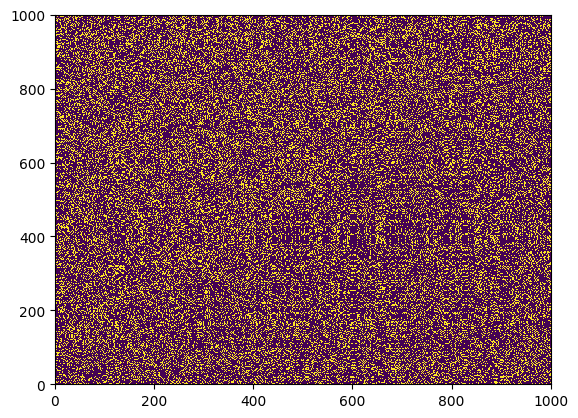

In [20]:
plt.pcolormesh(A)

In [21]:
A = np.triu(A,1)

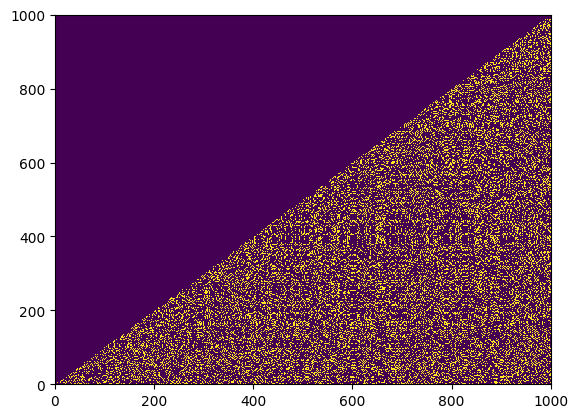

In [22]:
plt.pcolormesh(A)

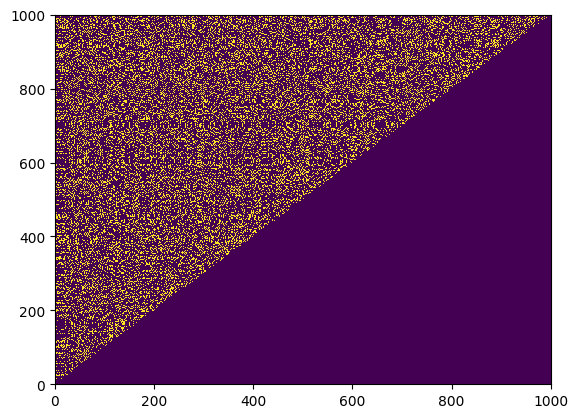

In [23]:
plt.pcolormesh(A.T)

In [24]:
A=A+A.T

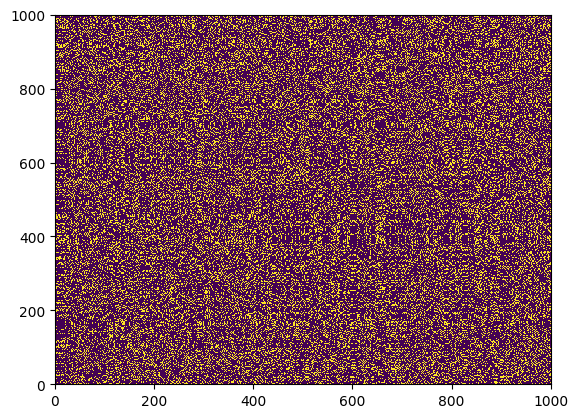

In [25]:
plt.pcolormesh(A)

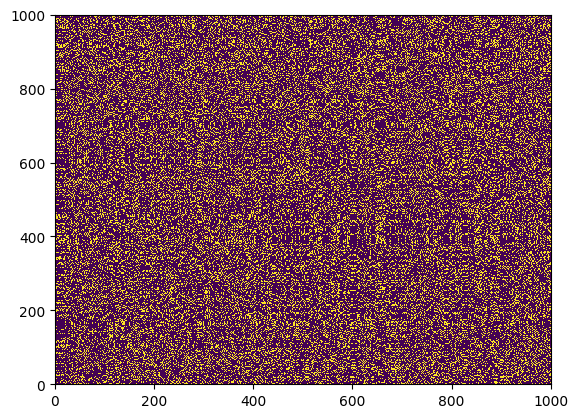

In [26]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

In [27]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

0.0

In [28]:
#checking the main diagonal -- it should be empty
sum(np.diag(A))

0.0

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [29]:
D=np.diag(sum(A))

In [30]:
min(sum(A))

185.0

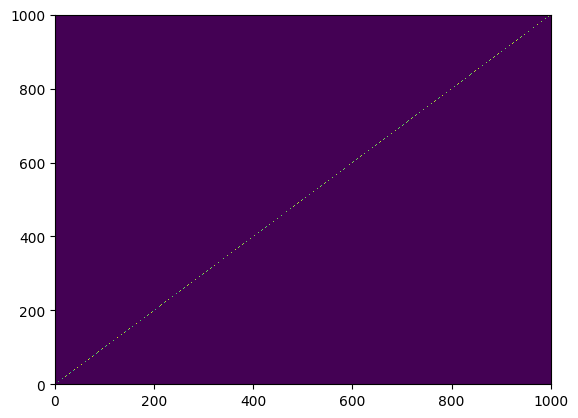

In [31]:
plt.pcolormesh(D);

In [32]:
L=D-A

In [33]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [34]:
import scipy
help(scipy.sparse.linalg.eigsh)

Help on function eigsh in module scipy.sparse.linalg._eigen.arpack.arpack:

eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex Hermitian matrix A.
    
    Solves ``A @ x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].
    
    If M is specified, solves ``A @ x[i] = w[i] * M @ x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i].
    
    Note that there is no specialized routine for the case when A is a complex
    Hermitian matrix. In this case, ``eigsh()`` will call ``eigs()`` and return the
    real parts of the eigenvalues thus obtained.
    
    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        A square operator representing the operation `

In [35]:
#W,V=np.linalg.eigh(L)

In [36]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [37]:
W.shape

(6,)

In [38]:
W

array([-6.49795632e-14,  4.68642837e+01,  1.82828170e+02,  1.87609646e+02,
        1.92764276e+02,  1.93034639e+02])

In [39]:
V[:,1]

array([ 0.03561996,  0.03644369, -0.02691312,  0.03573808,  0.03709257,
        0.03537603, -0.02810066,  0.0361561 , -0.02518882,  0.03560939,
       -0.02797302,  0.03554447, -0.02702038,  0.03594627, -0.02562126,
        0.03527745, -0.03065052,  0.03580651, -0.02622696,  0.03545679,
        0.03542989, -0.0249968 , -0.0257161 ,  0.03431854,  0.03544876,
        0.0347417 ,  0.03629663,  0.03600614, -0.02448312, -0.02420582,
       -0.02713658,  0.03588979,  0.03526386, -0.02657372, -0.02540099,
       -0.0295722 ,  0.03480546,  0.03554178, -0.026004  , -0.02531587,
       -0.02594758,  0.03653236, -0.0276995 ,  0.03503394, -0.02746948,
       -0.02761669, -0.02698555,  0.03471775,  0.03390301, -0.02943393,
       -0.02785519, -0.02692681,  0.03383728, -0.02653205, -0.02647454,
        0.03459923,  0.03328362,  0.03473555, -0.02752409, -0.02694885,
       -0.03047927,  0.03488529,  0.03552722, -0.0275381 , -0.02944269,
        0.03492682, -0.03009946, -0.0253513 , -0.02545188,  0.03

In [40]:
min(W),max(W)

(-6.497956315198452e-14, 193.0346385813173)

In [41]:
W

array([-6.49795632e-14,  4.68642837e+01,  1.82828170e+02,  1.87609646e+02,
        1.92764276e+02,  1.93034639e+02])

In [42]:
V[:,0] #the first samllest eigenvalue corresponds to the first eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162

In [43]:
from math import sqrt

In [44]:
sqrt(1/1000)

0.03162277660168379

In [45]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector
Y=V[:,2]

In [46]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

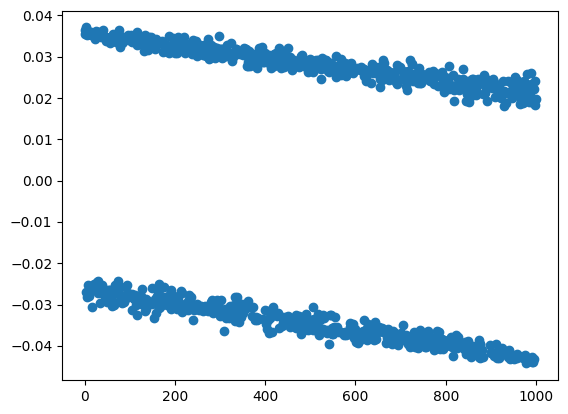

In [47]:
plt.plot(X,"o") #original X

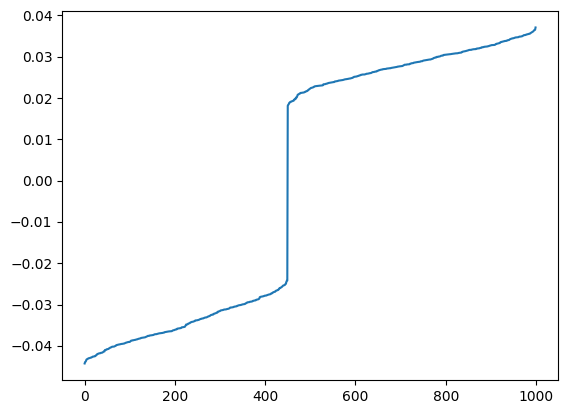

In [48]:
plt.plot(X[Ids1])

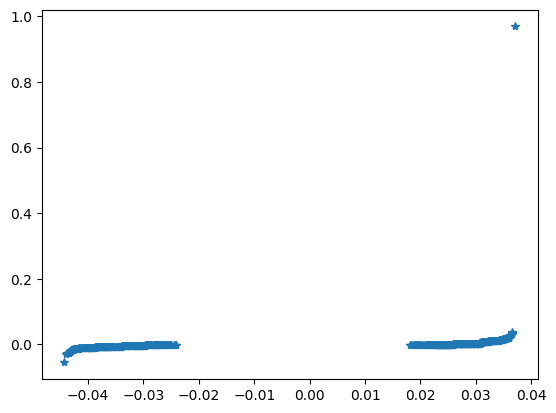

In [49]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

In [50]:
sum(np.dot(L,X)) #the result is non-zero

-1.780797731498751e-13

In [51]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

-4.179323553898939e-12

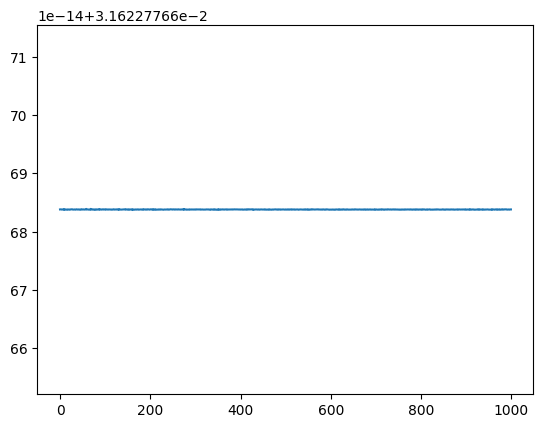

In [52]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [53]:
B=A[Ids1,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

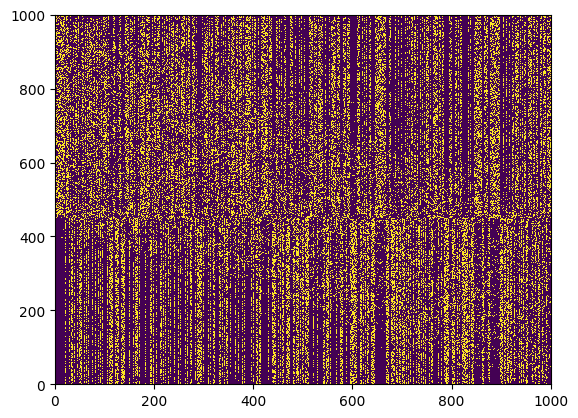

In [54]:
plt.pcolormesh(B)

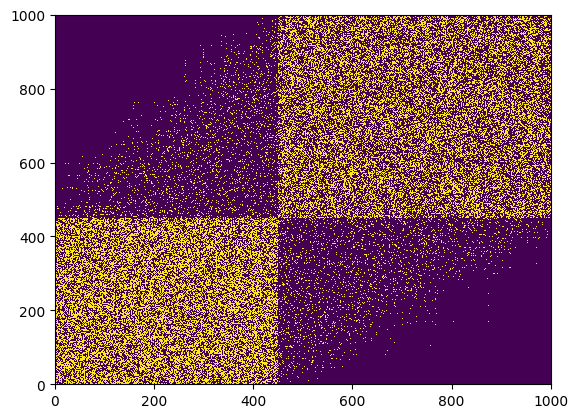

In [55]:
plt.pcolormesh(B[:,Ids1]) #second, by columns; we identified our communities

In [56]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [57]:
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [58]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
W[0] #even though due to numeric instability it is not zero in our method

-6.497956315198452e-14

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [60]:
# reading data, 2000 companies, 3000 advertising terms, 
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('yahoo/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

FileNotFoundError: yahoo/us.3k.2k.smat not found.

In [ ]:
a[1:10]

In [ ]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [ ]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [ ]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [ ]:
# let us read terms along with their ids
with open("yahoo/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [ ]:
labels

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

First, let's take a look at the matrix.

In [ ]:
plt.pcolormesh(A);

Let's calculate the Laplacian matrix, L=D-A.

In [ ]:
D=np.diag(sum(A))

In [ ]:
L = D - A

In [ ]:
W,V=eigsh(L,which='SA')

In [ ]:
W.shape

In [ ]:
W

Retrieve, sort, and show the second-smallest eigenvalue.

In [ ]:
X=V[:,1] 
Y=V[:,2]

In [ ]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

In [ ]:
plt.plot(X,"o") #original X

In [ ]:
plt.plot(X[Ids1])

We anticipate three sizable groups in our dataset since we can observe two sizable gaps in the sorted eigenvector state.

In [ ]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

Let's sort our matrix A by rows and, next, by columns, to see expected three large groups.

In [ ]:
B=A[Ids1,:]

In [ ]:
plt.pcolormesh(B[:,Ids1]);

In [ ]:
plabels = Ids1[Ids1 < 3000]

Examples of clusters:

In [ ]:
np.array(labels)[plabels[2500:2525]] 

In [ ]:
np.array(labels)[plabels[2325:2400]] 

In [ ]:
np.array(labels)[plabels[2100:2150]] 

Compare to a Spectral Clustering from Scikit-Learn that is provided out of the box.

In [ ]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels="kmeans")
plabels = spectral.fit_predict(A)
plt.scatter(A[:, 0], A[:, 1], c=plabels)
plt.show()

While our approach operates, a warning such as "Graph is not fully linked, spectral embedding may not perform as intended" may appear.